In [1]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import psycopg2

# Connection details
host = 'localhost'
user = 'postgres'
password = quote_plus('Shiv@11$')  # Encode special characters
dbname = 'SampleDB'
port = 5432

# Connect to PostgreSQL
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{dbname}")

# data = pd.read_excel("C:\\Users\\Shivmalhar\\Documents\\project\\intership_project\\PowerBI_Customer_Feedback_Dataset.xlsx")
# data.to_sql("customer_feedback_data", engine, if_exists="replace", index=False)

In [2]:
df = pd.read_sql('select * from customer_feedback_data',engine)
df.head()

,Customer ID,Country,Product,Rating,Feedback Score,Resolved,Response Time (hrs)
0,1,USA,Keyboard,3,80,Yes,59
1,2,Germany,Tablet,4,100,No,37
2,3,India,Laptop,2,96,No,33
3,4,USA,Laptop,5,73,No,52
4,5,Canada,Monitor,3,65,Yes,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer ID          200 non-null    int64 
 1   Country              200 non-null    object
 2   Product              200 non-null    object
 3   Rating               200 non-null    int64 
 4   Feedback Score       200 non-null    int64 
 5   Resolved             200 non-null    object
 6   Response Time (hrs)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Customer ID,Rating,Feedback Score,Response Time (hrs)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2.820000,50.725000,36.985000
std,57.879185,1.409801,28.121227,20.510195
min,1.000000,1.000000,2.000000,1.000000
25%,50.750000,2.000000,30.000000,19.750000
50%,100.500000,3.000000,48.500000,39.000000
75%,150.250000,4.000000,73.000000,53.250000
max,200.000000,5.000000,100.000000,71.000000


In [5]:
df.isnull().sum()

Customer ID            0
Country                0
Product                0
Rating                 0
Feedback Score         0
Resolved               0
Response Time (hrs)    0
dtype: int64

In [6]:
df['Customer ID'].duplicated().sum()

0

   Country Resolved  customer_satisfaction
0      USA      Yes                     27
1    India       No                     25
2    India      Yes                     23
3       UK       No                     20
4  Germany       No                     19
5  Germany      Yes                     19
6      USA       No                     18
7   Canada       No                     18
8   Canada      Yes                     16
9       UK      Yes                     15


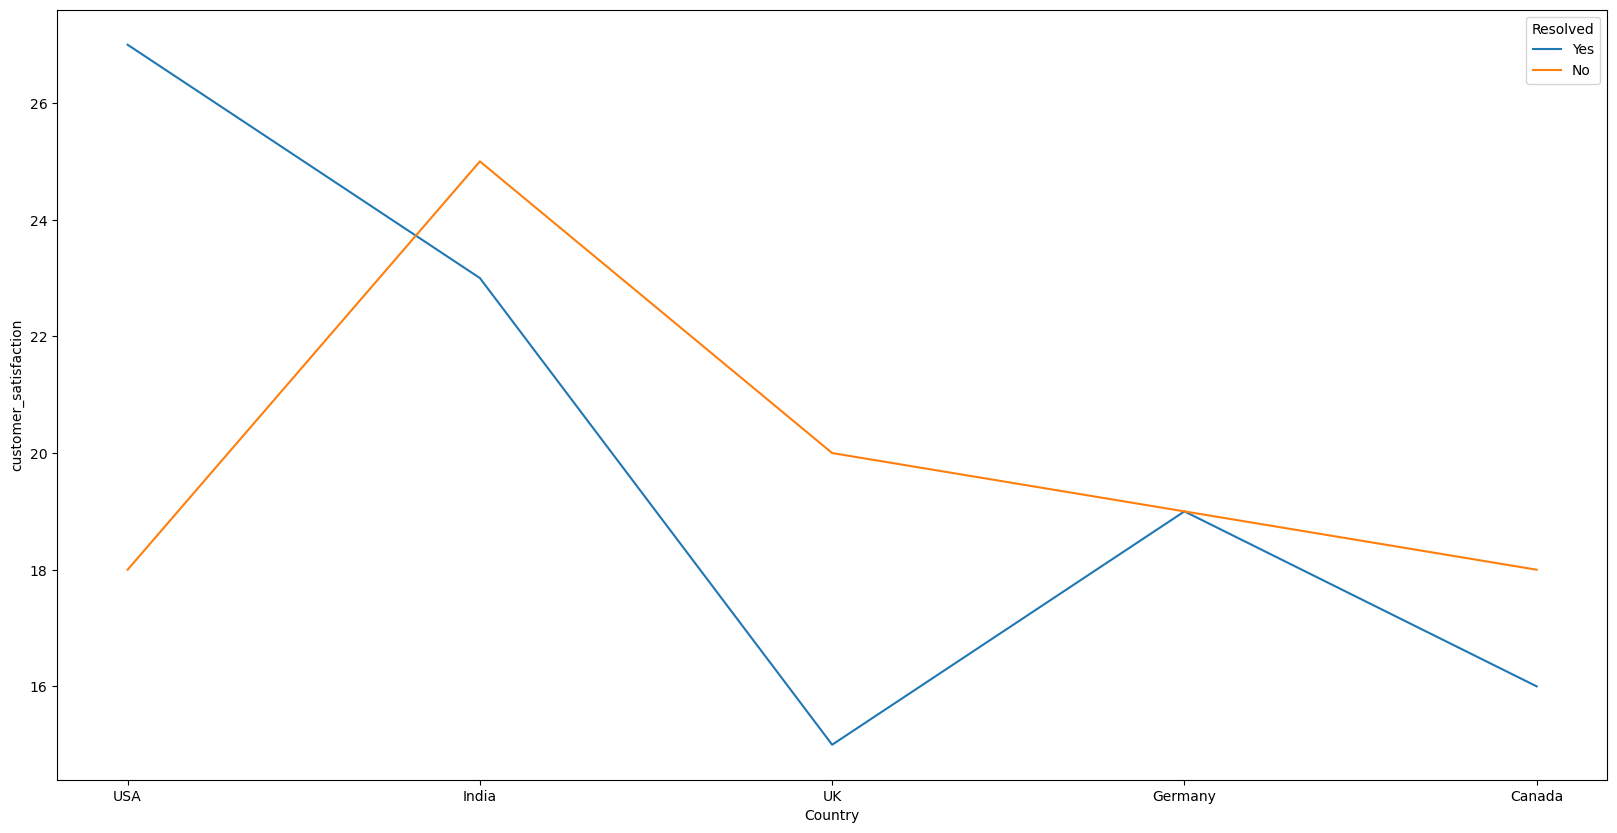

In [7]:
s = pd.read_sql(
    '''select "Country","Resolved",
       count("Resolved") 
       as "customer_satisfaction"
       from customer_feedback_data
       group by "Country","Resolved"
       order by "customer_satisfaction" desc
    ''' ,engine
)
print(s)
plt.figure(figsize = (20,10))
sns.lineplot(x =  "Country" ,y = "customer_satisfaction" ,hue = "Resolved" ,data = s)
plt.show()

      Product Resolved  customer_satisfaction
0      Tablet       No                     27
1  Smartphone       No                     23
2  Smartphone      Yes                     23
3      Laptop       No                     21
4    Keyboard      Yes                     20
5      Laptop      Yes                     20
6     Monitor      Yes                     19
7      Tablet      Yes                     18
8     Monitor       No                     18
9    Keyboard       No                     11


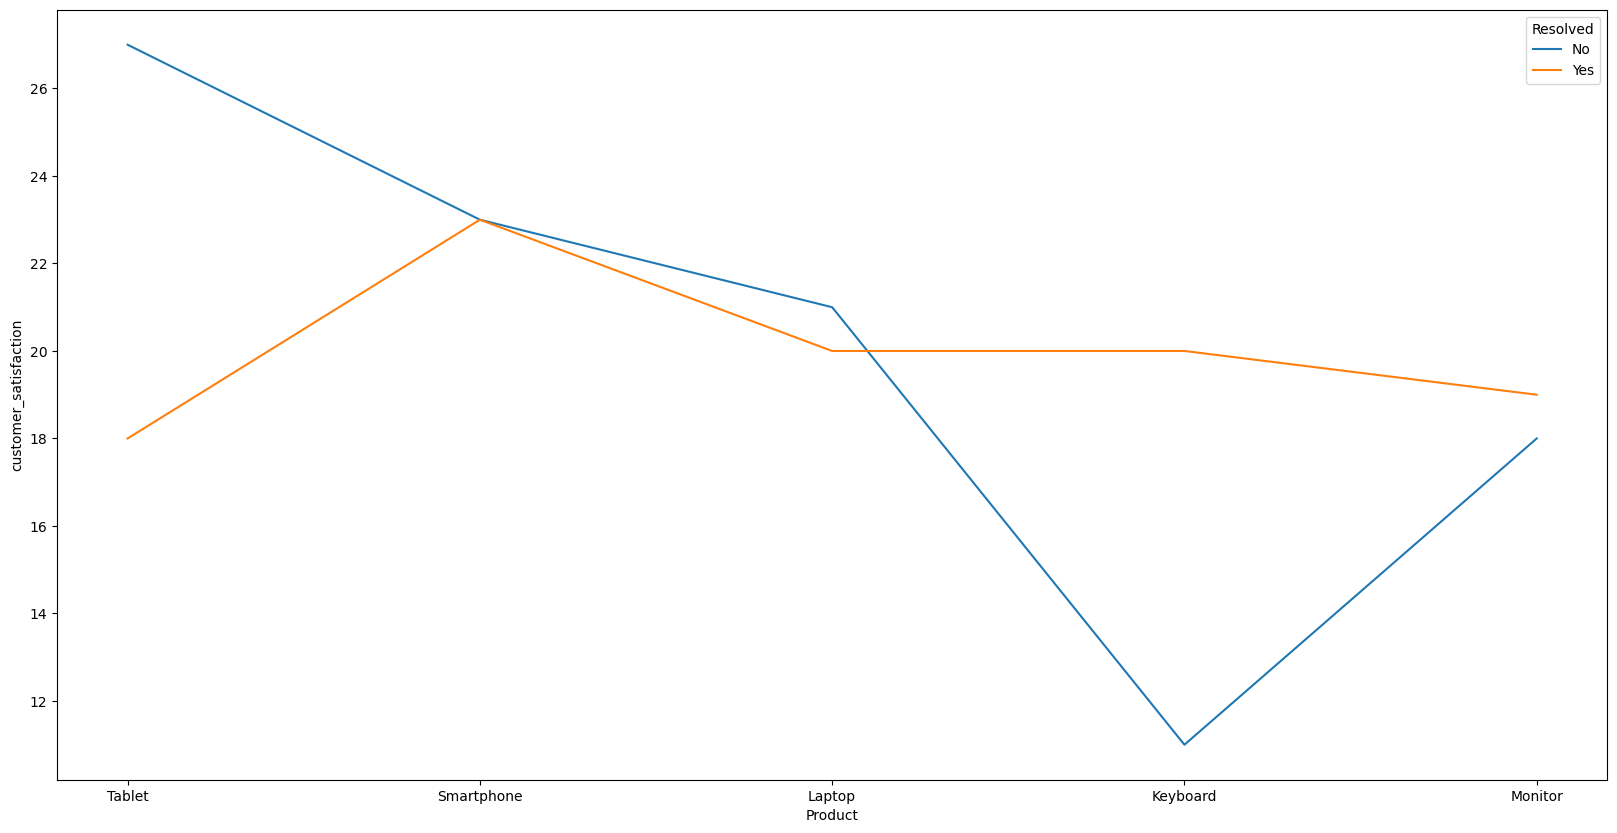

In [8]:
s2 = pd.read_sql(
    '''select "Product","Resolved",
       count("Resolved") 
       as Customer_Satisfaction
       from customer_feedback_data
       group by "Product","Resolved"
       order by customer_satisfaction desc
    ''' ,engine
)
print(s2)
plt.figure(figsize = (20,10))
sns.lineplot(x = "Product", y = "customer_satisfaction" ,hue = "Resolved" ,data = s2)
plt.show()

   Country  Feedback
0    India    2886.0
1      USA    2300.0
2  Germany    1779.0
3   Canada    1615.0
4       UK    1565.0


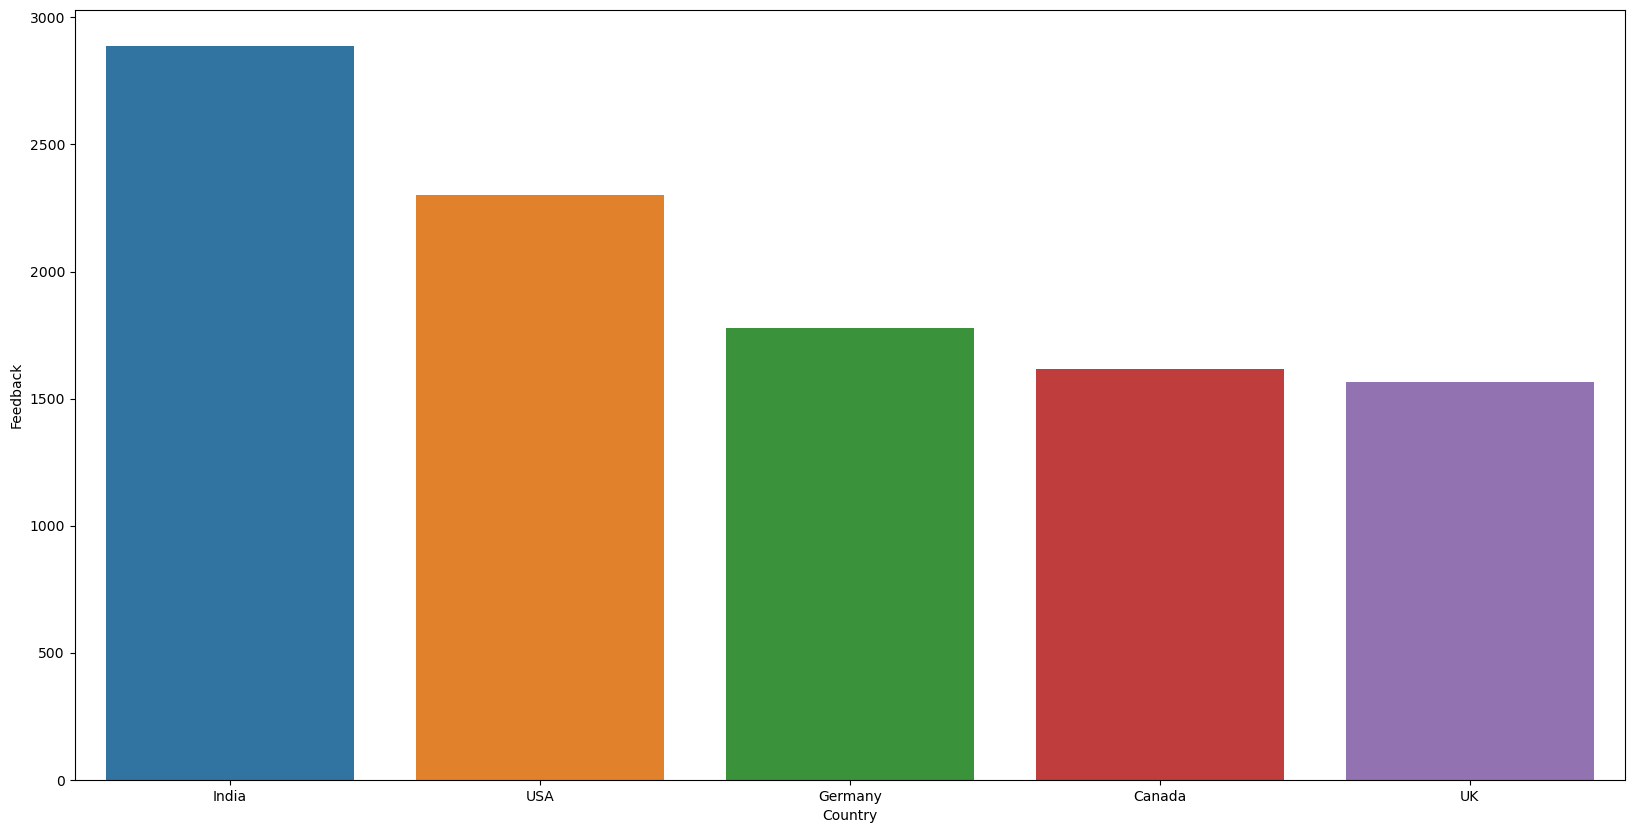

In [9]:
s3 = pd.read_sql(
    '''select "Country",
       sum("Feedback Score") 
       as "Feedback"
       from customer_feedback_data
       group by "Country"
       order by "Feedback" desc
    ''' ,engine
)
print(s3)
plt.figure(figsize = (20,10))
sns.barplot(x = "Country", y = "Feedback" ,data = s3)
plt.show()

      Product  Feedback
0      Tablet    2344.0
1  Smartphone    2222.0
2      Laptop    2181.0
3     Monitor    2114.0
4    Keyboard    1284.0


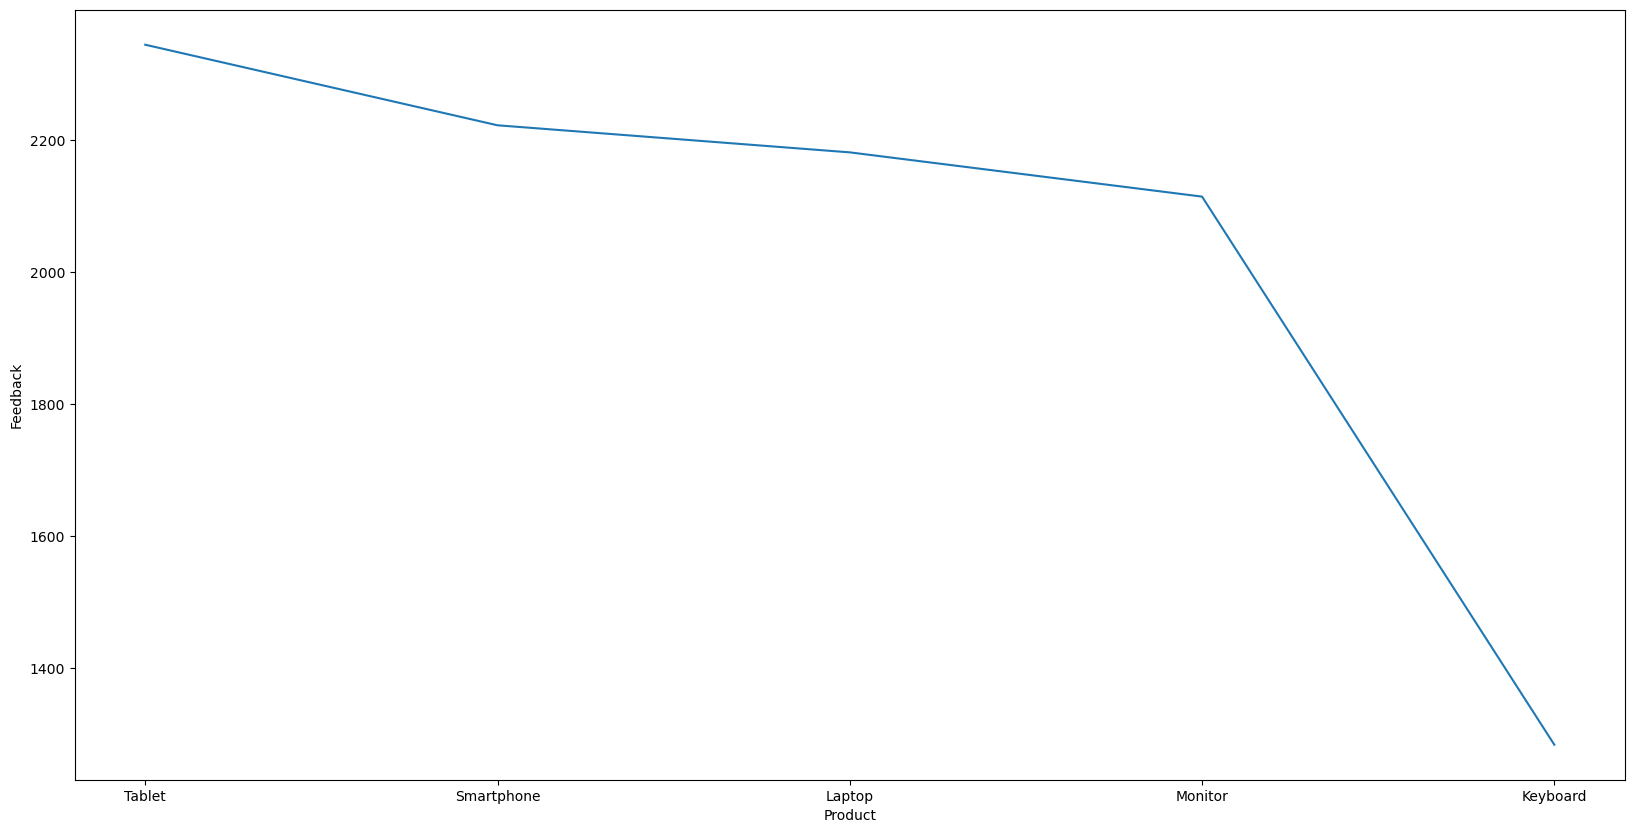

In [10]:
s4 = pd.read_sql(
    '''select "Product",
       sum("Feedback Score") 
       as "Feedback"
       from customer_feedback_data
       group by "Product"
       order by "Feedback" desc
    ''' ,engine
)
print(s4)

plt.figure(figsize = (20,10))
sns.lineplot(x = "Product", y = "Feedback" ,data = s4)
plt.show()

      Product  Rating Score
0  Smartphone         124.0
1      Tablet         124.0
2     Monitor         115.0
3      Laptop         112.0
4    Keyboard          89.0


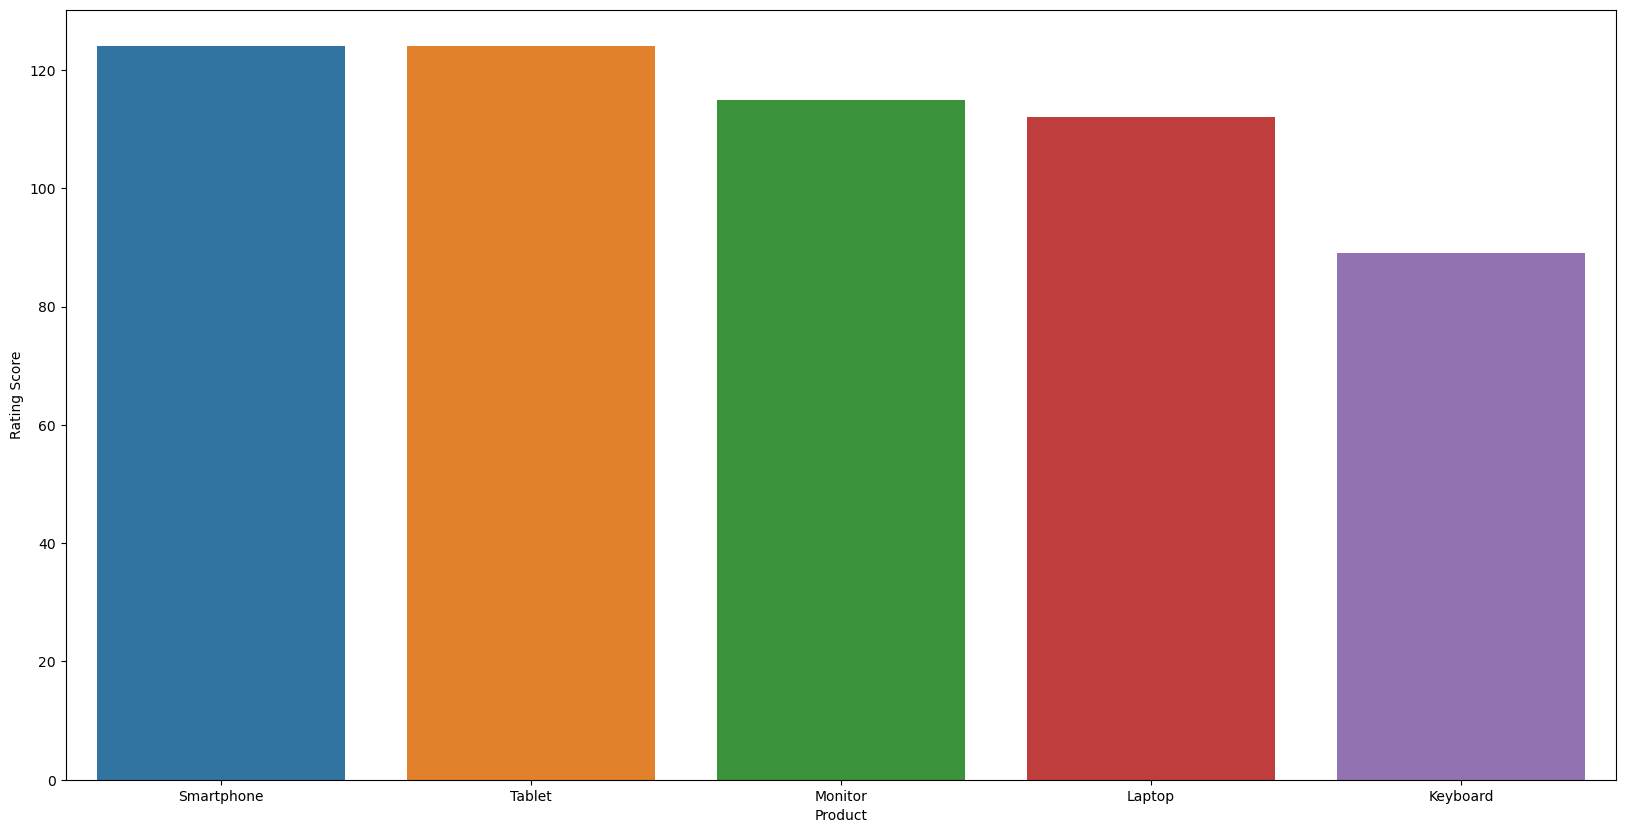

In [11]:
s5 = pd.read_sql(
    '''select "Product",
       sum("Rating") 
       as "Rating Score"
       from customer_feedback_data
       group by "Product"
       order by "Rating Score" desc
    ''' ,engine
)
print(s5)

plt.figure(figsize = (20,10))
sns.barplot(x = "Product", y = "Rating Score" ,data = s5)
plt.show()